# GP Object Detection {Casting Product}
# DEFECTO SYSTEM

In [1]:
import os
import keras

2023-07-06 15:23:15.681419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 15:23:15.720439: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 15:23:15.721629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 15:23:16.633031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip show tensorflow

In [3]:
import object_detection

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
labels = [{'name':'Good', 'id':1},{'name':'Defected', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [8]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [10]:

import os
import numpy
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

# Load previous model if there

# Continue

In [11]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [12]:
!pip install -v opencv-python==4.7.0.72

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Defaulting to user installation because normal site-packages is not writeable


Importing cv and Libraries to show pic

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [15]:
# !pip install keras

# Define classification model & function to classify given image

In [16]:

#import sys
#sys.path.insert(0, 'C:\\object detection at4\\env3\\Lib\\site-packages')

saved_model = tf.keras.models.load_model("model_vgg.h5", compile=False)
def classify(image1):
    img = np.array(image1) / 255.0
    img = img.reshape((1, 224, 224, 3))
    #img = image1
    #img = np.asarray(img)
    #img = np.expand_dims(img, axis=0)
    
    output = saved_model.predict(img)
    #print(output[0][0])
    #print(output[0][1])
    if output[0][0] > output[0][1]:
        return 'defected'
    else:
        return 'good'

# Test classification model

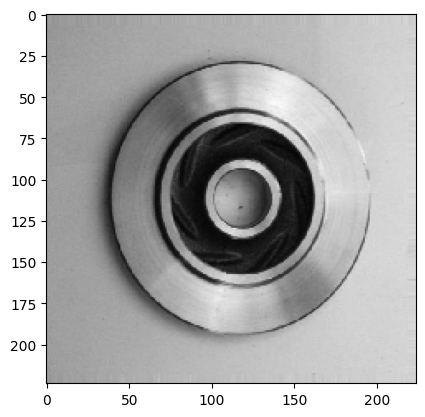

In [17]:
from keras.preprocessing import image
img = keras.utils.load_img("/home/ahmed/Final GP/test images/ok2.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [18]:
image_to_test=cv2.imread('/home/ahmed/Final GP/test images/ok2.jpeg')
resized_image = cv2.resize(image_to_test, (224,224), interpolation = cv2.INTER_AREA)
classify(resized_image)

1/1 [==============================] - 0s 257ms/step


'good'

# Test object detection then classify

## define function

In [19]:
def test_image(path):
    img = cv2.imread(path)
    image_np = np.array(img)

    #resize once for model to classify


    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    

    num_detections = int(detections.pop('num_detections'))
    print(num_detections)

    calssify_result='none';
    if(num_detections>=1):
        resized_image = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
        calssify_result=classify(resized_image)

    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    


    

    if (calssify_result=='good'):
        label_id_offset=1
    else:
        label_id_offset=2


    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    result=detections['detection_classes'] + label_id_offset
    print(result)
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

## Test with image 

100
1/1 [==============================] - 0s 133ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


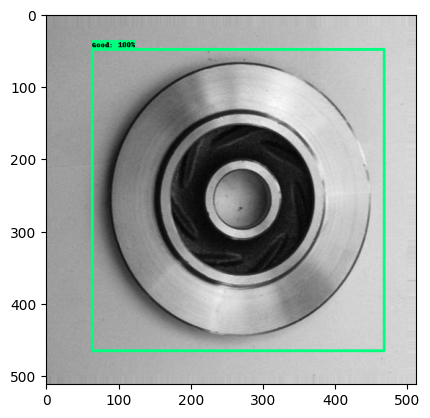

In [20]:
test_image('/home/ahmed/Final GP/test images/ok2.jpeg')

# Real-time detection & classification

# Demo with boxes

In [21]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

num_good = 0
num_defected = 0
box_color=(255,255,255)

capture_interval = 2  # Interval in seconds
prev_capture_time = 0
while cap.isOpened():
    ret, frame = cap.read()

    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    # Filter detections based on confidence threshold
    confidence_threshold = 0.95
    boxes = detections['detection_boxes']
    scores = detections['detection_scores']
    filtered_indices = np.where(scores >= confidence_threshold)[0]
    filtered_boxes = boxes[filtered_indices]

    # Get the coordinates of the filtered detection boxes
    height, width, _ = image_np_with_detections.shape
    
    
    current_time = cv2.getTickCount() / cv2.getTickFrequency()
    elapsed_time = current_time - prev_capture_time

    for box in filtered_boxes:
        ymin, xmin, ymax, xmax = box
        left = int(xmin * width)
        right = int(xmax * width)
        top = int(ymin * height)
        bottom = int(ymax * height)
        cropped_img = image_np[top:bottom,left:right] 
        #plt.imshow(cropped_img)
        #plt.show()
        result="CastingProduct"

        # Draw the borders with coordinates
        #cv2.rectangle(image_np_with_detections, (left, top), (right, bottom), (0, 255, 0), 2)
        #cv2.putText(image_np_with_detections,result, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
        #           (0, 255, 0), 2)
        
        if ( elapsed_time > capture_interval):
            classify_result = 'none'
            #label_id_offset = 8

            if num_detections >= 1:
                resized_image = cv2.resize(cropped_img, (224, 224), interpolation=cv2.INTER_AREA)
                classify_result = classify(resized_image)

            if classify_result == 'good':
                result="Good"
                box_color=(0, 255, 0)
                num_good += 1

            elif classify_result == 'defected':
                box_color=(0, 0, 255)
                result="Defected"
                num_defected += 1



            prev_capture_time = current_time
            cv2.rectangle(image_np_with_detections, (left, top), (right, bottom), box_color, 2)
            cv2.putText(image_np_with_detections,result, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,box_color, 2)

    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break
        
print("Number of 'good' products:", num_good)
print("Number of 'defected' products:", num_defected)        

1/1 [==============================] - 0s 135ms/step
Number of 'good' products: 2
Number of 'defected' products: 1


# With DEFECTO System GUI 

In [44]:
# after install tkinter
import tkinter as tk
import cv2
import numpy as np
import tensorflow as tf

# Function to start the session
def start_session():
    cap = cv2.VideoCapture(0)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    num_good = 0
    num_defected = 0
    box_color=(255,255,255)

    capture_interval = 2  # Interval in seconds
    prev_capture_time = 0
    while cap.isOpened():
        ret, frame = cap.read()

        image_np = np.array(frame)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        # Filter detections based on confidence threshold
        confidence_threshold = 0.95
        boxes = detections['detection_boxes']
        scores = detections['detection_scores']
        filtered_indices = np.where(scores >= confidence_threshold)[0]
        filtered_boxes = boxes[filtered_indices]

        # Get the coordinates of the filtered detection boxes
        height, width, _ = image_np_with_detections.shape

        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        elapsed_time = current_time - prev_capture_time

        for box in filtered_boxes:
            ymin, xmin, ymax, xmax = box
            left = int(xmin * width)
            right = int(xmax * width)
            top = int(ymin * height)
            bottom = int(ymax * height)
            cropped_img = image_np[top:bottom,left:right] 

            result="CastingProduct"

            if (elapsed_time > capture_interval):
                classify_result = 'none'

                if num_detections >= 1:
                    resized_image = cv2.resize(cropped_img, (224, 224), interpolation=cv2.INTER_AREA)
                    classify_result = classify(resized_image)

                if classify_result == 'good':
                    result = "Good"
                    box_color=(0, 255, 0)
                    num_good += 1
                elif classify_result == 'defected':
                    box_color=(0, 0, 255)
                    result = "Defected"
                    num_defected += 1

                prev_capture_time = current_time
                cv2.rectangle(image_np_with_detections, (left, top), (right, bottom), box_color, 2)
                cv2.putText(image_np_with_detections,result, (left, top - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)

        cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

        # Update the labels with the current counts
        good_label.config(text="Number of 'good' products: " + str(num_good))
        defected_label.config(text="Number of 'defected' products: " + str(num_defected))

    # After the session ends, display the final counts
    print("Number of 'good' products:", num_good)
    print("Number of 'defected' products:", num_defected)


In [55]:
# Create the Tkinter window
window = tk.Tk()
window.title("DEFECTO")


# Set window size and position it in the center of the screen
window.geometry("500x700")
window.eval('tk::PlaceWindow . center')

window.configure(bg="white")

# Create a label with the title "DEFECTO" centered
title_label = tk.Label(window, text="DEFECTO", font=("Helvetica", 24))
title_label.pack(pady=20)

# Create a label with a lower font size for the description
description_label = tk.Label(window, text="AI Defects Detection System", font=("Helvetica", 12))
description_label.pack()

# Create a logo image for your project (replace "logo.png" with the actual path to your logo image)
logo_path = "/home/ahmed/Final GP/logo.png"
logo_image = tk.PhotoImage(file=logo_path)
logo_label = tk.Label(window, image=logo_image)
logo_label.pack(pady=10)

# Create labels to display the counts
good_label = tk.Label(window, text="Number of 'good' products: 0")
good_label.pack()

defected_label = tk.Label(window, text="Number of 'defected' products: 0")
defected_label.pack()

# Create the Start Session button
start_button = tk.Button(window, text="Start Session", command=start_session, bg="green")
start_button.pack()

# Start the Tkinter event loop
window.mainloop()


Number of 'good' products: 0
Number of 'defected' products: 0
